# Importing Important Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [2]:
# Importing Dataset
data = pd.read_csv("C:/Users/Sharma/Downloads/ML Projects/Payment Date Prediction/dataset.csv")

DATA PREPCOSSING

In [3]:
# Overview of data
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


In [4]:
data.shape

(50000, 19)

In [5]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

- We can drop "area_business" as it contains all null values

In [6]:
# Uniqueness in columns
data.nunique()

business_code                 6
cust_number                1425
name_customer              4197
clear_date                  403
buisness_year                 2
doc_id                    48839
posting_date                506
document_create_date        507
document_create_date.1      506
due_in_date                 547
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44349
baseline_create_date        506
cust_payment_terms           74
invoice_id                48833
isOpen                        2
dtype: int64

- We can drop "posting_id" as it has only one value

In [7]:
# Checking Null Values
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [8]:
# Percentage of null values in clear date
(data['clear_date'].isnull().sum() / len(data)) * 100

20.0

- So we have around 20% of null values in clear_date column but we can't simply drop all these we will use these while predicting

In [9]:
# Duplicate rows
data[data.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190227,20190228,20190315.0,USD,RV,1.0,NaN,19557.41,20190228.0,NAH4,1.928870e+09,0
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190817,20190818,20190902.0,USD,RV,1.0,NaN,5600.41,20190818.0,NAH4,1.929758e+09,0
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191204,20191204,20191219.0,USD,RV,1.0,NaN,35352.17,20191204.0,NAH4,1.930217e+09,0
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191111,20191112,20191127.0,USD,RV,1.0,NaN,2982.64,20191112.0,NAH4,1.930137e+09,0
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200414,20200414,20200425.0,CAD,RV,1.0,NaN,82975.82,20200415.0,CA10,2.960629e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190722,20190725,20190809.0,USD,RV,1.0,NaN,6969.00,20190725.0,NAA8,1.929646e+09,0
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190112,20190113,20190128.0,USD,RV,1.0,NaN,10968.24,20190113.0,NAH4,1.928614e+09,0
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190530,20190529,20190613.0,USD,RV,1.0,NaN,155837.53,20190529.0,NAU5,1.929403e+09,0
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190522,20190522,20190606.0,USD,RV,1.0,NaN,4008.05,20190522.0,NAA8,1.929365e+09,0


- we have around 1161 duplicate rows so we can drop them

In [10]:
# Dropping duplicate rows
data = data.drop_duplicates(keep='first')

In [11]:
# Checking if duplicate columns present
data.duplicated().sum()

0

In [12]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


we can analzye that 
  - doc_id and invoice_id are similar 
  - document_create_date , document_create_date.1 and baseline_create_date are similar 
  - we can also drop 'isOpen' as our goal is to predict delay in payment date so it is not required

In [13]:
data[['doc_id','invoice_id']].corr()

,doc_id,invoice_id
doc_id,1.0,1.0
invoice_id,1.0,1.0


"doc_id" and "invoice_id" are highly correlated , so we can drop one

In [14]:
data[['document_create_date' , 'document_create_date.1','baseline_create_date' ]].corr()

,document_create_date,document_create_date.1,baseline_create_date
document_create_date,1.000000,0.994443,0.993962
document_create_date.1,0.994443,1.000000,0.999515
baseline_create_date,0.993962,0.999515,1.000000


"document_create_date" , "document_create_date.1" and "baseline_create_date" are highly correlated , so we can drop one 

## Droping unnecessary columns

In [15]:
data= data.drop(['area_business',
                 'posting_id',
                 'doc_id',
                 'document_create_date',
                 'baseline_create_date',
                 'posting_date',
                 'invoice_id',
                 'isOpen'],axis=1)

In [16]:
data.shape

(48839, 11)

In [17]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,20200126,20200210.0,USD,RV,54273.28,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,20190722,20190811.0,USD,RV,79656.60,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,20190914,20190929.0,USD,RV,2253.86,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,20200330,20200410.0,CAD,RV,3299.70,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,20191113,20191128.0,USD,RV,33133.29,NAH4


## Data Type Conversion

In [18]:
# checking datatype of columns
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
total_open_amount         float64
cust_payment_terms         object
dtype: object

### Converting date columns to date-time format

In [19]:
data['clear_date'] = pd.to_datetime(data['clear_date'])
data['document_create_date.1'] = pd.to_datetime(data['document_create_date.1'],format = '%Y%m%d')
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format = '%Y%m%d')

In [20]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,2020-01-26,2020-02-10,USD,RV,54273.28,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019.0,2019-07-22,2019-08-11,USD,RV,79656.60,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,2019-09-14,2019-09-29,USD,RV,2253.86,NAA8
3,CA02,0140105686,SYSC llc,NaT,2020.0,2020-03-30,2020-04-10,CAD,RV,3299.70,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,2019-11-13,2019-11-28,USD,RV,33133.29,NAH4


## Converting  currency USD of 'total_open_amount'  

In [21]:
data['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

- 1 CAD = 0.7 USD

In [22]:
data['total_open_amount'] = np.where(data['invoice_currency'] == "CAD" , data['total_open_amount'] * 0.7, data['total_open_amount'])

- now we can 'invoice_currency' from the data, it is of no use

In [23]:
# Droping 'invoice_currency'
data = data.drop(['invoice_currency'],axis=1)

In [24]:
data.shape

(48839, 10)

## TARGET VARIABLE

to predict the payment date taking target varibale as delay of no of days 

delay = clear_date - due_in_date

In [25]:
data['Delay'] = data['clear_date'] - data['due_in_date']

In [26]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,document type,total_open_amount,cust_payment_terms,Delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,2020-01-26,2020-02-10,RV,54273.28,NAH4,1 days
1,U001,0200980828,BEN E,2019-08-08,2019.0,2019-07-22,2019-08-11,RV,79656.60,NAD1,-3 days
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,2019-09-14,2019-09-29,RV,2253.86,NAA8,92 days
3,CA02,0140105686,SYSC llc,NaT,2020.0,2020-03-30,2020-04-10,RV,2309.79,CA10,NaT
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,2019-11-13,2019-11-28,RV,33133.29,NAH4,-3 days


As we have 20% clear_date values missing so splitting those rows first

In [27]:
missing_clear_date = data[data['clear_date'].isnull()].copy()

In [28]:
missing_clear_date.shape

(9681, 11)

In [29]:
main_data = data.dropna()

In [30]:
main_data.shape

(39158, 11)

In [31]:
main_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,document type,total_open_amount,cust_payment_terms,Delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,2020-01-26,2020-02-10,RV,54273.280,NAH4,1 days
1,U001,0200980828,BEN E,2019-08-08,2019.0,2019-07-22,2019-08-11,RV,79656.600,NAD1,-3 days
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,2019-09-14,2019-09-29,RV,2253.860,NAA8,92 days
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,2019-11-13,2019-11-28,RV,33133.290,NAH4,-3 days
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2019-09-20,2019-10-04,RV,15558.088,CA10,61 days


# EDA

In [32]:
# Analyzing business_code
main_data['business_code'].value_counts()

U001    35417
CA02     3122
U013      492
U002      115
U005        9
U007        3
Name: business_code, dtype: int64

C:\Users\Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='business_code', ylabel='count'>

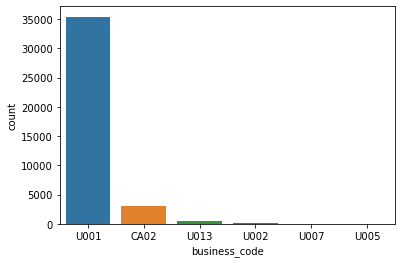

In [33]:
sns.countplot(main_data['business_code'])

- as UO01, has high occurance. So rest can be treated as others while **Label Encoding**

C:\Users\Sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2.425292998803252
13.61418906218448


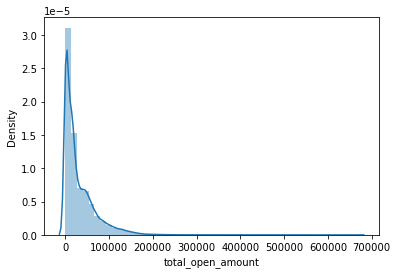

In [34]:
#Analyze the 'total_open_amount'
sns.distplot(main_data['total_open_amount'])
print(main_data['total_open_amount'].skew())
print(main_data['total_open_amount'].kurtosis())

- Graph is positively skwed with :

Skew = 2.764745234661219

Kurtosis = 15.389271822717307

C:\Users\Sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.9803345238968956
0.5909085061753818


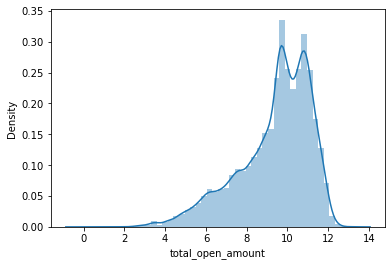

In [35]:
# Lets normalize this using Log Transforming to remove skewness

sns.distplot(np.log(main_data['total_open_amount']))
print(np.log(main_data['total_open_amount']).skew())
print(np.log(main_data['total_open_amount']).kurtosis())


As it has now skness and kurtosis more closer to zero. 

In [36]:
main_data['total_open_amount'] = np.log(main_data['total_open_amount'])

C:\Users\Sharma\AppData\Local\Temp/ipykernel_688/2685464928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['total_open_amount'] = np.log(main_data['total_open_amount'])


In [37]:
# Analzye document_type
main_data['document type'].value_counts()

RV    39152
X2        6
Name: document type, dtype: int64

- entire column has only one value throughout, so we can drop this

In [38]:
# Analyze cust_payment_terms
main_data['cust_payment_terms'].value_counts()

NAA8    15651
NAH4    10374
CA10     3021
NAC6     1291
NAM4     1092
        ...  
CA60        1
NAUW        1
NATV        1
NABD        1
MC15        1
Name: cust_payment_terms, Length: 70, dtype: int64

- has to be encoded

# FEATURE ENGINEERING

In [39]:
# Droping the unnecesary columns
main_data.drop(['document type','buisness_year'],axis=1,inplace=True)

C:\Users\Sharma\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
main_data.shape

(39158, 9)

## Handling Categorical Features

In [41]:
# Label Encoding of business_code
main_data['business_code'].value_counts()

U001    35417
CA02     3122
U013      492
U002      115
U005        9
U007        3
Name: business_code, dtype: int64

- U001 has high occurance, so it can be encoded as 1 , and rest all other as 0

In [42]:
main_data['business_code']= main_data.assign(business_code = np.where(main_data['business_code'] == 'U001', 1, 0)).business_code

C:\Users\Sharma\AppData\Local\Temp/ipykernel_688/2448796103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['business_code']= main_data.assign(business_code = np.where(main_data['business_code'] == 'U001', 1, 0)).business_code


In [43]:
# Encoding cust_payment_terms

print(main_data['cust_payment_terms'].value_counts())

print("Percentage of NAA8 present in cust_payment_terms=",end=" ")
print((main_data['cust_payment_terms'].value_counts()/main_data['cust_payment_terms'].value_counts().sum()).iloc[:1].sum() * 100)

print("Percentage of NAH4 present in cust_payment_India",end=" ")
print((main_data['cust_payment_terms'].value_counts()/main_data['cust_payment_terms'].value_counts().sum()).iloc[1:2].sum()*100)

#Finding frequency by sum value for 'others' category(not including NAA8 and NAH4) 
print("Percentage of Others values present in cust_payment_india=",end=" ")
print((main_data['cust_payment_terms'].value_counts()/main_data['cust_payment_terms'].value_counts().sum()).iloc[2:].sum()*100)

NAA8    15651
NAH4    10374
CA10     3021
NAC6     1291
NAM4     1092
        ...  
CA60        1
NAUW        1
NATV        1
NABD        1
MC15        1
Name: cust_payment_terms, Length: 70, dtype: int64
Percentage of NAA8 present in cust_payment_terms= 39.96884416977374
Percentage of NAH4 present in cust_payment_India 26.4926707186271
Percentage of Others values present in cust_payment_india= 33.53848511159916


- Therefore:

  NAA8 = 3 , (39.4 %)
  
  NAH4 = 2 , (26.49 %)
  
  Others = 1 , (33.5 %)

In [44]:
# ENCODING of cust_payment_terms
encoded_terms = {
        "NAA8": 3,
        "NAH4": 2,
        "OTHER": 1
    }

unique_terms = main_data['cust_payment_terms'].unique()

for term in unique_terms:
        if term not in encoded_terms:
            encoded_terms[term]=1

main_data['cust_payment_terms'] = main_data['cust_payment_terms'].apply(lambda x: encoded_terms[x])

C:\Users\Sharma\AppData\Local\Temp/ipykernel_688/1759278185.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['cust_payment_terms'] = main_data['cust_payment_terms'].apply(lambda x: encoded_terms[x])


In [45]:
main_data.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,Delay
0,1,0200769623,WAL-MAR corp,2020-02-11,2020-01-26,2020-02-10,10.901787,2,1 days
1,1,0200980828,BEN E,2019-08-08,2019-07-22,2019-08-11,11.285480,1,-3 days
2,1,0200792734,MDV/ trust,2019-12-30,2019-09-14,2019-09-29,7.720400,3,92 days
4,1,0200769623,WAL-MAR foundation,2019-11-25,2019-11-13,2019-11-28,10.408294,2,-3 days
5,0,0140106181,THE corporation,2019-12-04,2019-09-20,2019-10-04,9.652336,1,61 days


In [46]:
main_data['cust_payment_terms'].value_counts()

3    15651
1    13133
2    10374
Name: cust_payment_terms, dtype: int64

In [47]:
main_data.dtypes

business_code                       int32
cust_number                        object
name_customer                      object
clear_date                 datetime64[ns]
document_create_date.1     datetime64[ns]
due_in_date                datetime64[ns]
total_open_amount                 float64
cust_payment_terms                  int64
Delay                     timedelta64[ns]
dtype: object

In [48]:
# Encoding cust_number
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

main_data['cust_number']=le.fit_transform(main_data['cust_number'])

C:\Users\Sharma\AppData\Local\Temp/ipykernel_688/3736910123.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['cust_number']=le.fit_transform(main_data['cust_number'])


- as every customer would have unique cust_number so we ca drop 'name_customer' 

In [49]:
main_data = main_data.drop(['name_customer'],axis=1)

Handling columns with date : clear_date , document_create_date.1 , due_in_date
- we can drop clear_date as we have calculated target from it
- we have to make other columns as int so for that extracting date, month and year 

In [50]:
main_data = main_data.drop(['clear_date'],axis=1)

In [51]:
main_data.dtypes

business_code                       int32
cust_number                         int32
document_create_date.1     datetime64[ns]
due_in_date                datetime64[ns]
total_open_amount                 float64
cust_payment_terms                  int64
Delay                     timedelta64[ns]
dtype: object

### Handling columns with data-type as datetime.

In [52]:
def convert_day_and_month(main_data):
    main_data['post_day'] = main_data['document_create_date.1'].dt.day
    main_data['post_month'] = main_data['document_create_date.1'].dt.month
    
    main_data['due_day'] = main_data['due_in_date'].dt.day
    main_data['due_month'] = main_data['due_in_date'].dt.month

    
convert_day_and_month(main_data)

In [53]:
main_data.head()

,business_code,cust_number,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,Delay,post_day,post_month,due_day,due_month
0,1,850,2020-01-26,2020-02-10,10.901787,2,1 days,26,1,10,2
1,1,1004,2019-07-22,2019-08-11,11.285480,1,-3 days,22,7,11,8
2,1,915,2019-09-14,2019-09-29,7.720400,3,92 days,14,9,29,9
4,1,850,2019-11-13,2019-11-28,10.408294,2,-3 days,13,11,28,11
5,0,412,2019-09-20,2019-10-04,9.652336,1,61 days,20,9,4,10


In [54]:
# Converting 'Delay' column to int
main_data['Delay'] = main_data['Delay'].dt.days.astype('int')

In [55]:
# Droping datetime columns
main_data = main_data.drop(['document_create_date.1','due_in_date'],axis=1)

In [56]:
main_data.dtypes

business_code           int32
cust_number             int32
total_open_amount     float64
cust_payment_terms      int64
Delay                   int32
post_day                int64
post_month              int64
due_day                 int64
due_month               int64
dtype: object

## Multicolinearity

In [57]:
# Checking co-relation between columns
corr_ = main_data.corr()

<AxesSubplot:>

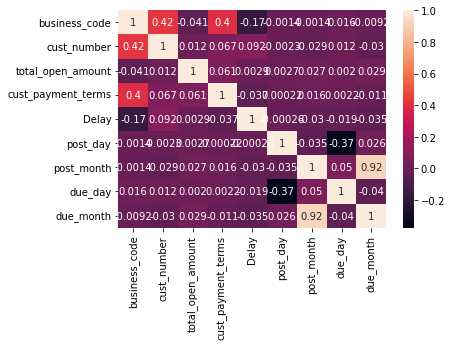

In [58]:
sns.heatmap(corr_,annot=True)

Conclusions :
- no correlation found


# TRAIN TEST SPLIT

In [59]:
X = main_data.drop(['Delay'],axis=1)
y = main_data['Delay']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [61]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((31326, 8), (7832, 8), (31326,), (7832,))

# MODELLING

- Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)
predicted_1 = model1.predict(X_test)

In [63]:
# Accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(y_test,predicted_1,squared=False))
print(r2_score(y_test,predicted_1))

10.631527059206595
0.060962841359530784


- Decision Tree Regression

In [64]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train)
predicted_2 = model2.predict(X_test)

In [65]:
print(mean_squared_error(y_test,predicted_2,squared=False))
print(r2_score(y_test,predicted_2))

10.876665681372316
0.017159510029632785


- Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(random_state=0)
model3.fit(X_train,y_train)
predicted_3 = model3.predict(X_test)

In [67]:
print(mean_squared_error(y_test,predicted_3,squared=False))
print(r2_score(y_test,predicted_3))

8.19238045340699
0.44241419920928904
